In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans, DBSCAN

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print('Train set', train.shape)
print('Test set', test.shape)

# outlier 제거
train = train[train['trip_duration'] < 1500000]

Train set (1458644, 11)
Test set (625134, 9)


### array of location data

In [3]:
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values))

## 1. KMeans

In [4]:
inertia = []
k_list = range(1, 11)
for k in k_list:
    cluster = KMeans(n_clusters = k)
    cluster.fit(coords)
    inertia.append(cluster.inertia_)

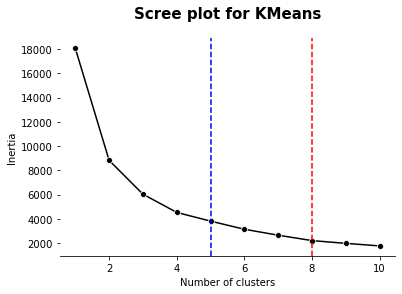

In [28]:
ax = sns.lineplot(range(1, 11), inertia, marker = 'o', color = 'black', linewidth = 1.5)
plt.axvline(x = 8, color = 'red', linestyle = '--')
plt.axvline(x = 5, color = 'blue', linestyle = '--')
for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)
plt.xlabel('Number of clusters'); plt.ylabel('Inertia')
plt.title('Scree plot for KMeans', fontsize = 15, fontweight = 'bold', pad = 20)
plt.show()

In [29]:
cluster = KMeans(n_clusters = 8).fit(coords)
cluster

KMeans(n_clusters=5)

In [30]:
train['pickup_cluster'] = cluster.predict(train[['pickup_latitude', 'pickup_longitude']])
train['dropoff_cluster'] = cluster.predict(train[['dropoff_latitude', 'dropoff_longitude']])

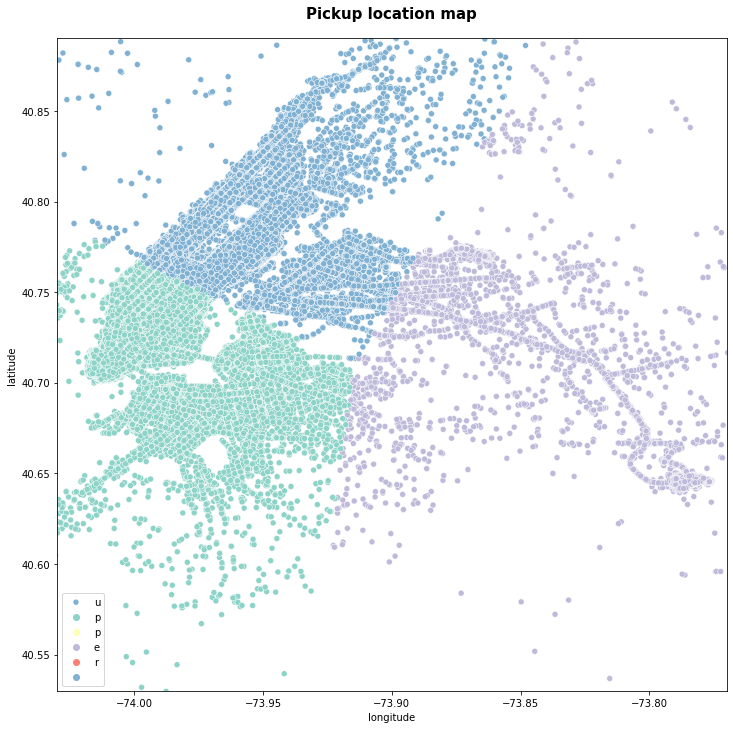

In [32]:
plt.figure(figsize=(12,12))
plt.xlim([-74.03, -73.77]); plt.ylim([40.53, 40.89])
sns.scatterplot(train['pickup_longitude'].values,train['pickup_latitude'].values, 
                hue = train['pickup_cluster'], palette = sns.color_palette("Set3", 8))
plt.legend('upper right')
plt.title('Pickup location map', fontsize = 15, fontweight = 'bold', pad = 20); plt.xlabel('longitude');plt.ylabel('latitude')
plt.show()

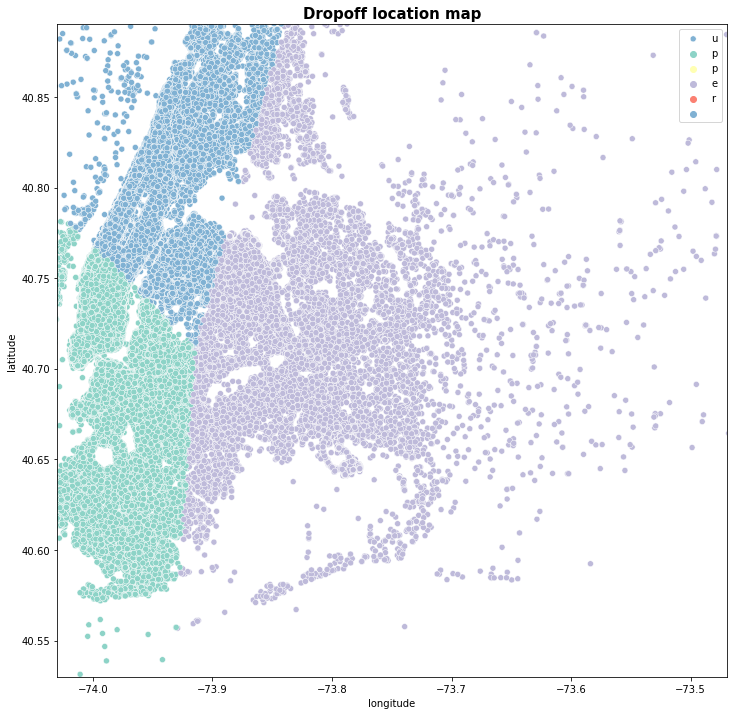

In [33]:
plt.figure(figsize=(12,12))
plt.xlim([-74.03, -73.47]); plt.ylim([40.53, 40.89])
sns.scatterplot(train['dropoff_longitude'].values,train['dropoff_latitude'].values, 
                hue = train['dropoff_cluster'], palette = sns.color_palette("Set3", 8))
plt.legend('upper right')
plt.title('Dropoff location map', fontsize = 15, fontweight = 'bold'); plt.xlabel('longitude');plt.ylabel('latitude')
plt.show()

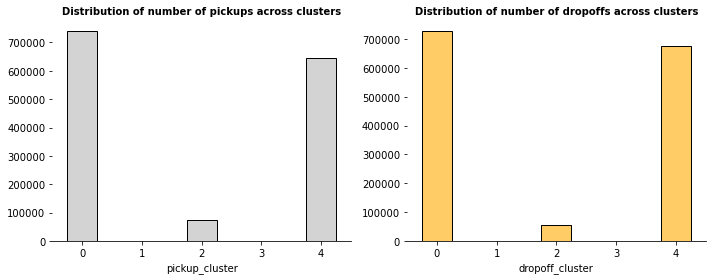

In [50]:
plt.figure(figsize = (10, 4))
ax1 = plt.subplot(1, 2, 1)
train.groupby(['pickup_cluster'])['store_and_fwd_flag'].count().plot.bar(color = 'lightgrey', edgecolor = 'k', ax = ax1)
ax1.set_title('Distribution of number of pickups across clusters', fontsize = 10, fontweight = 'bold')
ax1.set_xticklabels(labels = range(0, 5), rotation = 0)

ax2 = plt.subplot(1, 2, 2)
train.groupby(['dropoff_cluster'])['store_and_fwd_flag'].count().plot.bar(color = '#ffcc66', edgecolor = 'k', ax = ax2)
ax2.set_title('Distribution of number of dropoffs across clusters', fontsize = 10, fontweight = 'bold')
ax2.set_xticklabels(labels = range(0, 5), rotation = 0)

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
plt.tight_layout()
plt.show()

## 2. DBSCAN

In [ ]:
dbs = DBSCAN(eps = 1, min_samples = 10)
dbs.fit_predict(np.vstack(train[['pickup_latitude', 'pickup_longitude']].values))